In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["MKL_NUM_THREADS"] = "4"

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
traindata = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(traindata, batch_size=4, shuffle=True, num_workers=2)

testdata = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testdata, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.fc2 = nn.Linear(64, 10)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = x.view(-1, 64 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

for epoch in range(20):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 70 %


In [4]:
# Class wise accuracy

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 75 %
Accuracy of   car : 76 %
Accuracy of  bird : 57 %
Accuracy of   cat : 56 %
Accuracy of  deer : 60 %
Accuracy of   dog : 63 %
Accuracy of  frog : 75 %
Accuracy of horse : 84 %
Accuracy of  ship : 82 %
Accuracy of truck : 73 %


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
[0.6436985421931185, 0.6259312926884368, 0.6066817069961457, 0.589546145662954, 0.5719271258290625, 0.5537207170562353, 0.53695751557983, 0.5207757950703753, 0.50577585588546, 0.49111041609419975, 0.4740028419686481, 0.45941796199019763, 0.444307783245162, 0.43154777751097106, 0.41884279367562965, 0.40377681570697166, 0.38947954616199626, 0.37730551287195907, 0.364080267945372, 0.351560325909339]
[4.068944336105231, 3.9344741336051374, 3.8018432223740732, 3.6852970351319296, 3.5671877560424385, 3.4504774786477443, 3.340686915445118, 3.2370629168249434, 3.1369609188026515, 3.0425847198600184, 2.933311160479253, 2.8389170496694627, 2.7416142998762747, 2.6594727559973776, 2.5751808188144873, 2.478050341088537, 2.3883680501357842, 2.310081344505692, 2.225591408233659, 2.1468537847238562]


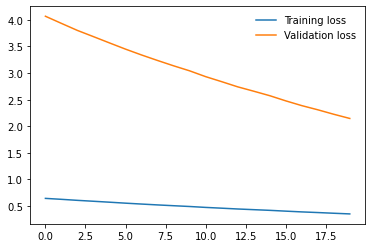

In [5]:
# Calculate training and validation loss vs epoch
train_loss = []
valid_loss = []
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss / len(trainloader))

    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        outputs = net(inputs)
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    valid_loss.append(running_loss / len(testloader))
    print('Epoch:', epoch)

print(train_loss)
print(valid_loss)

# Plot training and validation loss vs epoch
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend(frameon=False)